## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [4]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from xgboost import XGBClassifier, plot_tree # XGB 분류기 (얘는 sklearn 아님)
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### **나.  학습데이터 불러오기**

In [134]:
df = pd.read_csv('train_dataset.csv', delimiter=',')

In [19]:
df.loc[:, 'url_ip_present'].head(20)

#unnamed는 인덱스가 임의로 빠져나온것, 나중에 데이터 전처리때 드랍하면 됨.

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    1.0
Name: url_ip_present, dtype: float64

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [38]:
print(type('X-Axis'))

<class 'str'>


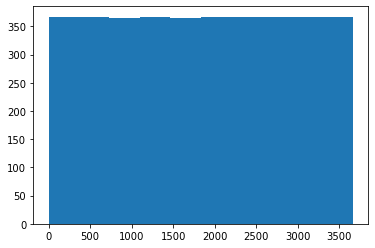

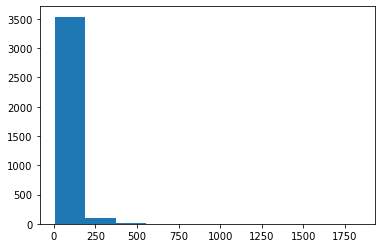

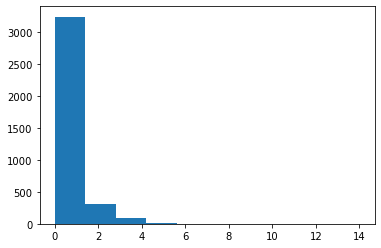

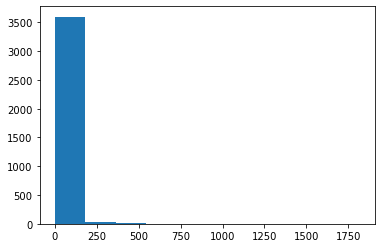

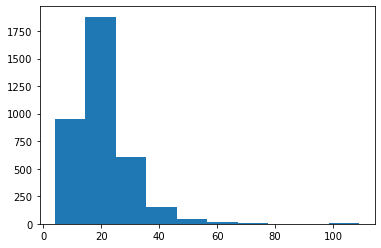

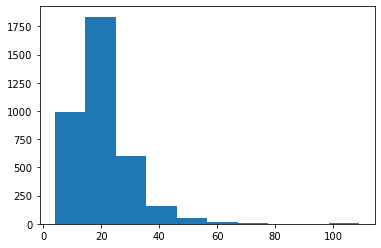

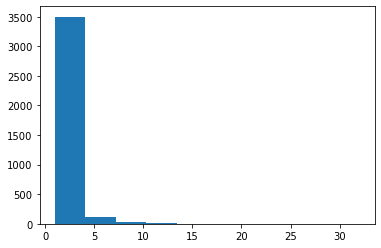

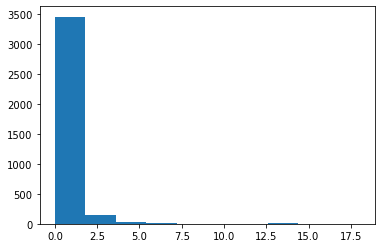

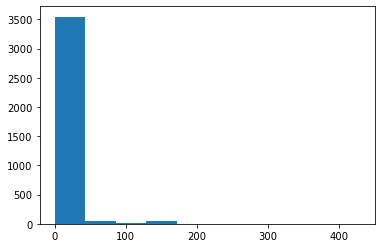

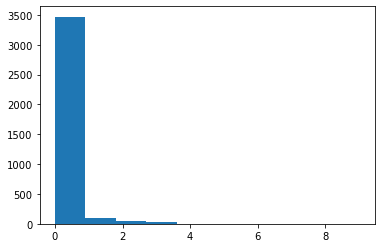

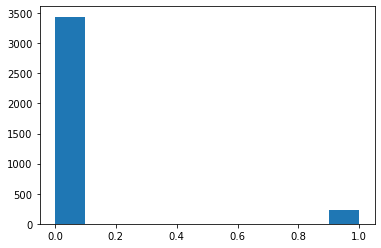

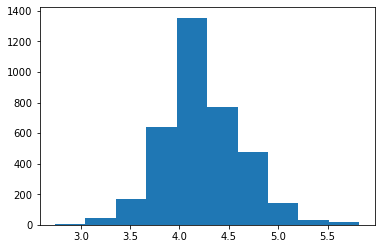

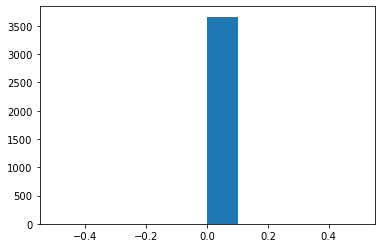

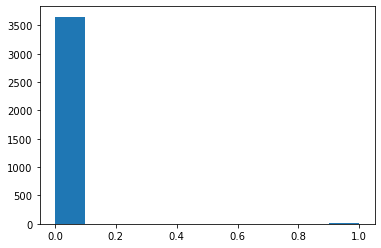

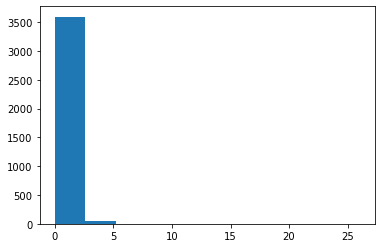

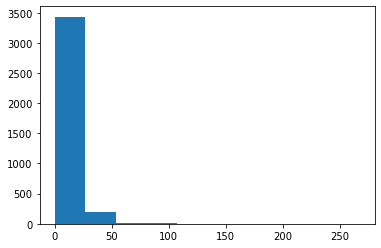

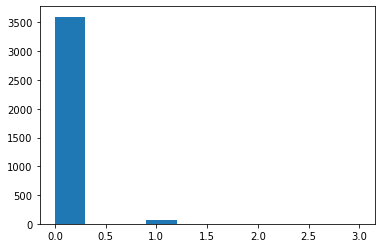

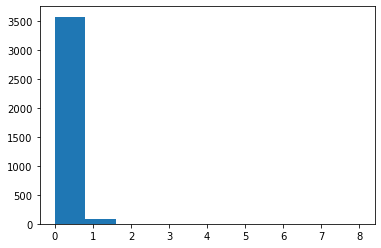

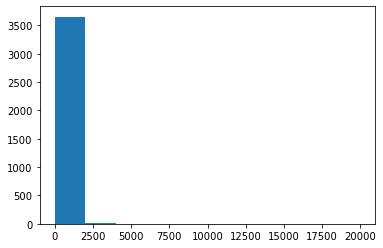

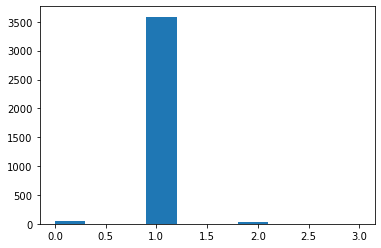

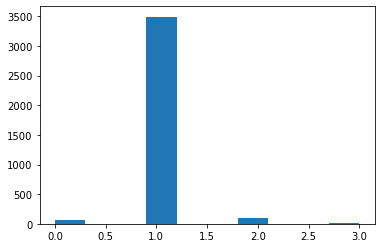

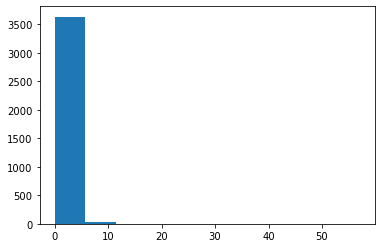

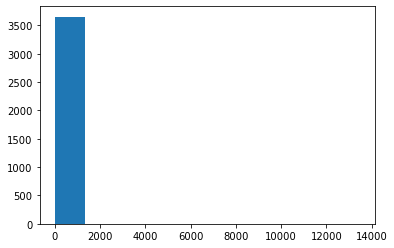

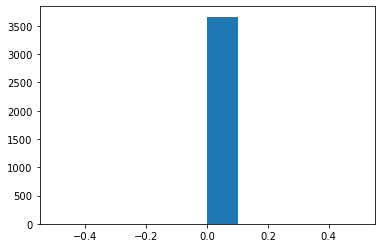

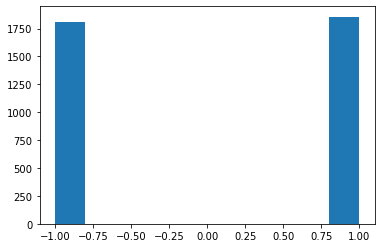

In [40]:
for i in df.columns:
    plt.hist(df[i])
    plt.show()

In [21]:
df['url_len'].describe()

count    3662.000000
mean       54.572365
std        82.513738
min         6.000000
25%        24.000000
50%        36.000000
75%        55.000000
max      1837.000000
Name: url_len, dtype: float64

(array([3.536e+03, 9.800e+01, 1.700e+01, 2.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([   6. ,  189.1,  372.2,  555.3,  738.4,  921.5, 1104.6, 1287.7,
        1470.8, 1653.9, 1837. ]),
 <BarContainer object of 10 artists>)

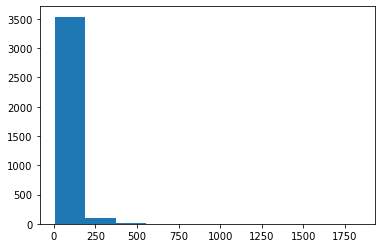

In [23]:
plt.hist(df['url_len'])

(array([   5.,   46.,  172.,  641., 1355.,  773.,  478.,  144.,   31.,
          17.]),
 array([2.73783942, 3.04623368, 3.35462795, 3.66302221, 3.97141648,
        4.27981074, 4.58820501, 4.89659927, 5.20499354, 5.5133878 ,
        5.82178206]),
 <BarContainer object of 10 artists>)

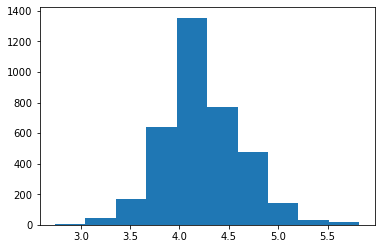

In [24]:
plt.hist(df['url_entropy'])

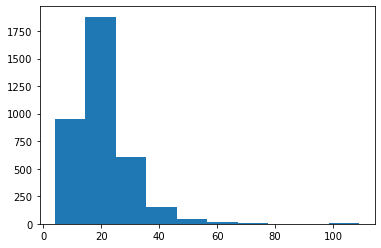

In [26]:
plt.hist(df['url_domain_len'])
plt.show()

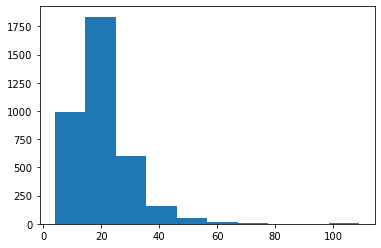

In [28]:
plt.hist(df['url_hostname_len'])
plt.show()

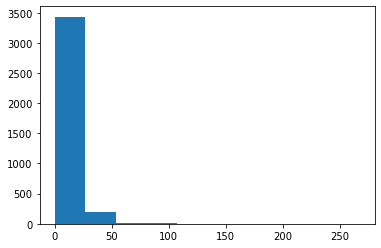

In [30]:
plt.hist(df["html_num_tags('script')"])
plt.show()

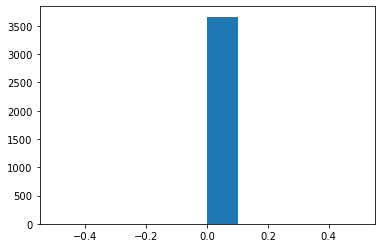

In [31]:
plt.hist(df["html_num_tags('applet')"])
plt.show()

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [44]:
target = 'Result_v1'

In [61]:
import scipy.stats as spst
import statsmodels.api as sm

In [58]:
feature = 'url_entropy'

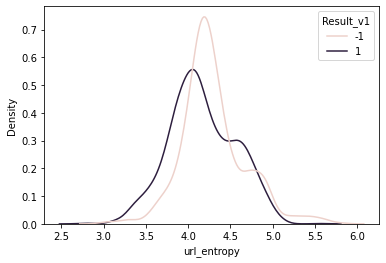

In [62]:
sns.kdeplot(x=feature, data = df, hue =target)
plt.show()

In [64]:
target_np = df[[target]]

In [73]:
target_np = target_np.replace([-1, 1], [0, 1])

In [77]:
model = sm.Logit(target_np, df[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_entropy    0.915585
dtype: float64


# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [5]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

In [6]:
# 중복 데이터 제거를 제거합니다.
df.drop_duplicates()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious
3660,3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,benign
3661,3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,...,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,malicious
3662,3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,benign


In [7]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [1]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


### <span style="color:darkred">[문제2] replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경해주세요. 삭제 후 df['Result_v1'] 전후 데이터를 비교해 보세요.<span>

In [8]:
# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인
df['Result_v1'].unique()


array(['malicious', 'benign'], dtype=object)

In [9]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.
df = df.replace(['benign', 'malicious'], [1, -1])





In [10]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인
df['Result_v1'].unique()


array([-1,  1], dtype=int64)

---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [135]:
# 결축치의 존재를 확인합니다.
df.isna().sum()


Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [136]:
# 결측치를 적절히 처리해줍니다.
df = df.dropna()



In [137]:
# 결축치의 존재를 확인합니다.
df.isna().sum()


Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

In [153]:
# 'benign'은 1로 'malicious'은 -1로
df['Result_v1'] = df['Result_v1'].replace([1, -1], [1, 0])

In [154]:
df[target]

0       0
1       1
2       1
3       1
4       1
       ..
3659    0
3660    1
3661    0
3662    1
3663    1
Name: Result_v1, Length: 3662, dtype: int64

In [155]:
x = df.drop(columns=target)

In [156]:
x.drop(columns='Unnamed: 0', inplace=True)

In [157]:
y = df.loc[:, [target]]

In [158]:
y

,Result_v1
0,0
1,1
2,1
3,1
4,1
...,...
3659,0
3660,1
3661,0
3662,1


In [159]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)

In [160]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

In [161]:
model = XGBClassifier()

In [162]:
params = {
    'max_depth' : [3, 5, 8],
    'n_estimators' : [50, 100, 150],
    'learning_rate' : np.linspace(0.1, 0.2, 3)
}

In [163]:
m_gs = GridSearchCV(model, params, cv=5, verbose=3)

In [164]:
m_gs.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=150; total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth

[CV 3/5] END learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.0s
[CV 4/5] END learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.1s
[CV 5/5] END learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.0s
[CV 1/5] END learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.1s
[CV 2/5] END learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.1s
[CV 3/5] END learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.1s
[CV 4/5] END learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.1s
[CV 5/5] END learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.1s
[CV 1/5] END learning_rate=0.2, max_depth=3, n_estimators=150; total time=   0.1s
[CV 2/5] END learning_rate=0.2, max_depth=3, n_estimators=150; total time=   0.1s
[CV 3/5] END learning_rate=0.2, max_depth=3, n_estimators=150; total time=   0.1s
[CV 4/5] END learning_rate=0.2, max_depth=3, n_estimators=150; total time=   0.1s
[CV 5/5] END learni

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...hot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
         

TypeError: 'str' object is not callable

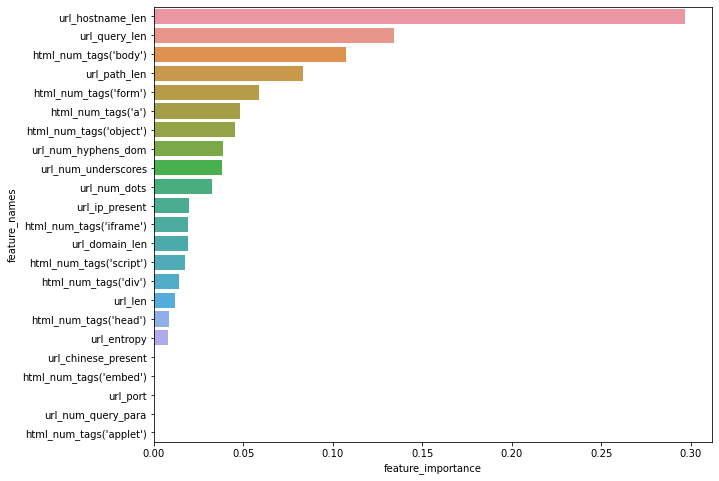

In [166]:
plot_feature_importance(m_gs.best_estimator_.feature_importances_, x_train.columns)

## RandomForest

In [179]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()

In [180]:
params = {
    'n_estimators': [50, 100, 150],
    'max_features': range(1, 12),
    'max_depth':[3, 5, 8]
    
}

In [181]:
m_gs3 = GridSearchCV(model4, params, cv=5, verbose=3)

In [183]:
m_gs3.fit(x_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ...max_depth=3, max_features=1, n_estimators=50; total time=   0.0s
[CV 2/5] END ...max_depth=3, max_features=1, n_estimators=50; total time=   0.0s
[CV 3/5] END ...max_depth=3, max_features=1, n_estimators=50; total time=   0.0s
[CV 4/5] END ...max_depth=3, max_features=1, n_estimators=50; total time=   0.0s
[CV 5/5] END ...max_depth=3, max_features=1, n_estimators=50; total time=   0.0s
[CV 1/5] END ..max_depth=3, max_features=1, n_estimators=100; total time=   0.1s
[CV 2/5] END ..max_depth=3, max_features=1, n_estimators=100; total time=   0.1s
[CV 3/5] END ..max_depth=3, max_features=1, n_estimators=100; total time=   0.1s
[CV 4/5] END ..max_depth=3, max_features=1, n_estimators=100; total time=   0.1s
[CV 5/5] END ..max_depth=3, max_features=1, n_estimators=100; total time=   0.1s
[CV 1/5] END ..max_depth=3, max_features=1, n_estimators=150; total time=   0.2s
[CV 2/5] END ..max_depth=3, max_features=1, n_e

[CV 2/5] END ..max_depth=3, max_features=7, n_estimators=150; total time=   0.3s
[CV 3/5] END ..max_depth=3, max_features=7, n_estimators=150; total time=   0.3s
[CV 4/5] END ..max_depth=3, max_features=7, n_estimators=150; total time=   0.3s
[CV 5/5] END ..max_depth=3, max_features=7, n_estimators=150; total time=   0.3s
[CV 1/5] END ...max_depth=3, max_features=8, n_estimators=50; total time=   0.0s
[CV 2/5] END ...max_depth=3, max_features=8, n_estimators=50; total time=   0.1s
[CV 3/5] END ...max_depth=3, max_features=8, n_estimators=50; total time=   0.1s
[CV 4/5] END ...max_depth=3, max_features=8, n_estimators=50; total time=   0.1s
[CV 5/5] END ...max_depth=3, max_features=8, n_estimators=50; total time=   0.0s
[CV 1/5] END ..max_depth=3, max_features=8, n_estimators=100; total time=   0.2s
[CV 2/5] END ..max_depth=3, max_features=8, n_estimators=100; total time=   0.2s
[CV 3/5] END ..max_depth=3, max_features=8, n_estimators=100; total time=   0.2s
[CV 4/5] END ..max_depth=3, 

[CV 4/5] END ..max_depth=5, max_features=3, n_estimators=100; total time=   0.1s
[CV 5/5] END ..max_depth=5, max_features=3, n_estimators=100; total time=   0.1s
[CV 1/5] END ..max_depth=5, max_features=3, n_estimators=150; total time=   0.3s
[CV 2/5] END ..max_depth=5, max_features=3, n_estimators=150; total time=   0.3s
[CV 3/5] END ..max_depth=5, max_features=3, n_estimators=150; total time=   0.3s
[CV 4/5] END ..max_depth=5, max_features=3, n_estimators=150; total time=   0.3s
[CV 5/5] END ..max_depth=5, max_features=3, n_estimators=150; total time=   0.3s
[CV 1/5] END ...max_depth=5, max_features=4, n_estimators=50; total time=   0.0s
[CV 2/5] END ...max_depth=5, max_features=4, n_estimators=50; total time=   0.0s
[CV 3/5] END ...max_depth=5, max_features=4, n_estimators=50; total time=   0.0s
[CV 4/5] END ...max_depth=5, max_features=4, n_estimators=50; total time=   0.0s
[CV 5/5] END ...max_depth=5, max_features=4, n_estimators=50; total time=   0.0s
[CV 1/5] END ..max_depth=5, 

[CV 1/5] END .max_depth=5, max_features=10, n_estimators=100; total time=   0.2s
[CV 2/5] END .max_depth=5, max_features=10, n_estimators=100; total time=   0.2s
[CV 3/5] END .max_depth=5, max_features=10, n_estimators=100; total time=   0.3s
[CV 4/5] END .max_depth=5, max_features=10, n_estimators=100; total time=   0.2s
[CV 5/5] END .max_depth=5, max_features=10, n_estimators=100; total time=   0.3s
[CV 1/5] END .max_depth=5, max_features=10, n_estimators=150; total time=   0.5s
[CV 2/5] END .max_depth=5, max_features=10, n_estimators=150; total time=   0.4s
[CV 3/5] END .max_depth=5, max_features=10, n_estimators=150; total time=   0.4s
[CV 4/5] END .max_depth=5, max_features=10, n_estimators=150; total time=   0.4s
[CV 5/5] END .max_depth=5, max_features=10, n_estimators=150; total time=   0.4s
[CV 1/5] END ..max_depth=5, max_features=11, n_estimators=50; total time=   0.1s
[CV 2/5] END ..max_depth=5, max_features=11, n_estimators=50; total time=   0.1s
[CV 3/5] END ..max_depth=5, 

[CV 3/5] END ...max_depth=8, max_features=6, n_estimators=50; total time=   0.1s
[CV 4/5] END ...max_depth=8, max_features=6, n_estimators=50; total time=   0.1s
[CV 5/5] END ...max_depth=8, max_features=6, n_estimators=50; total time=   0.1s
[CV 1/5] END ..max_depth=8, max_features=6, n_estimators=100; total time=   0.3s
[CV 2/5] END ..max_depth=8, max_features=6, n_estimators=100; total time=   0.3s
[CV 3/5] END ..max_depth=8, max_features=6, n_estimators=100; total time=   0.3s
[CV 4/5] END ..max_depth=8, max_features=6, n_estimators=100; total time=   0.3s
[CV 5/5] END ..max_depth=8, max_features=6, n_estimators=100; total time=   0.3s
[CV 1/5] END ..max_depth=8, max_features=6, n_estimators=150; total time=   0.5s
[CV 2/5] END ..max_depth=8, max_features=6, n_estimators=150; total time=   0.4s
[CV 3/5] END ..max_depth=8, max_features=6, n_estimators=150; total time=   0.5s
[CV 4/5] END ..max_depth=8, max_features=6, n_estimators=150; total time=   0.6s
[CV 5/5] END ..max_depth=8, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8], 'max_features': range(1, 12),
                         'n_estimators': [50, 100, 150]},
             verbose=3)

TypeError: 'str' object is not callable

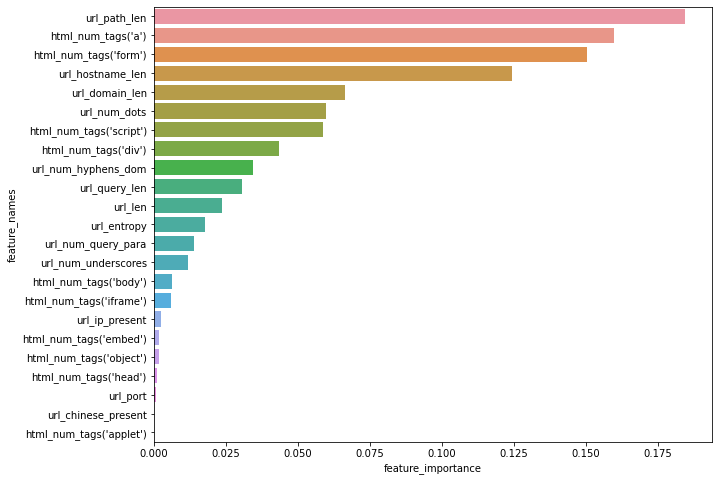

In [185]:
plot_feature_importance(m_gs3.best_estimator_.feature_importances_, x_train.columns)

In [203]:
m_gs.best_score_

0.9633246527777779

In [187]:
cols = ['url_path_len', "html_num_tags('a')", "html_num_tags('form')","url_hostname_len","url_num_dots","url_num_hyphens_dom","url_query_len",
       "url_domain_len", "url_num_dots", "html_num_tags('script')", "html_num_tags('div')"]

In [188]:
x.drop(columns=cols, axis=1, inplace=True)

In [202]:
m_gs3.best_score_

0.9492750974658868

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [189]:
x_train, y_val, y_train, y_val = train_test_split(x, y, test_size=0.3)

In [190]:
scaler = MinMaxScaler()

In [191]:
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.fit(x_val)

## SVM

In [192]:
params = {
    'C' : np.linspace(0.01, 100, 50),
    'gamma': [0.001, 0.01, 0.1, 1]
}

In [193]:
from sklearn.svm import SVC
model2 = SVC()

In [194]:
m_gs2 = GridSearchCV(model2, params, cv=5, verbose=3)

In [195]:
m_gs2.fit(x_train_s, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END ............................C=0.01, gamma=0.001; total time=   0.3s
[CV 2/5] END ............................C=0.01, gamma=0.001; total time=   0.3s
[CV 3/5] END ............................C=0.01, gamma=0.001; total time=   0.3s
[CV 4/5] END ............................C=0.01, gamma=0.001; total time=   0.3s
[CV 5/5] END ............................C=0.01, gamma=0.001; total time=   0.3s
[CV 1/5] END .............................C=0.01, gamma=0.01; total time=   0.3s
[CV 2/5] END .............................C=0.01, gamma=0.01; total time=   0.3s
[CV 3/5] END .............................C=0.01, gamma=0.01; total time=   0.3s
[CV 4/5] END .............................C=0.01, gamma=0.01; total time=   0.3s
[CV 5/5] END .............................C=0.01, gamma=0.01; total time=   0.3s
[CV 1/5] END ..............................C=0.01, gamma=0.1; total time=   0.3s
[CV 2/5] END ..............................C=

[CV 2/5] END ..............C=10.213061224489795, gamma=0.001; total time=   0.5s
[CV 3/5] END ..............C=10.213061224489795, gamma=0.001; total time=   0.4s
[CV 4/5] END ..............C=10.213061224489795, gamma=0.001; total time=   0.4s
[CV 5/5] END ..............C=10.213061224489795, gamma=0.001; total time=   0.3s
[CV 1/5] END ...............C=10.213061224489795, gamma=0.01; total time=   0.4s
[CV 2/5] END ...............C=10.213061224489795, gamma=0.01; total time=   0.4s
[CV 3/5] END ...............C=10.213061224489795, gamma=0.01; total time=   0.4s
[CV 4/5] END ...............C=10.213061224489795, gamma=0.01; total time=   0.3s
[CV 5/5] END ...............C=10.213061224489795, gamma=0.01; total time=   0.3s
[CV 1/5] END ................C=10.213061224489795, gamma=0.1; total time=   0.3s
[CV 2/5] END ................C=10.213061224489795, gamma=0.1; total time=   0.3s
[CV 3/5] END ................C=10.213061224489795, gamma=0.1; total time=   0.3s
[CV 4/5] END ...............

[CV 4/5] END ..............C=20.416122448979593, gamma=0.001; total time=   0.3s
[CV 5/5] END ..............C=20.416122448979593, gamma=0.001; total time=   0.3s
[CV 1/5] END ...............C=20.416122448979593, gamma=0.01; total time=   0.3s
[CV 2/5] END ...............C=20.416122448979593, gamma=0.01; total time=   0.3s
[CV 3/5] END ...............C=20.416122448979593, gamma=0.01; total time=   0.4s
[CV 4/5] END ...............C=20.416122448979593, gamma=0.01; total time=   0.4s
[CV 5/5] END ...............C=20.416122448979593, gamma=0.01; total time=   0.3s
[CV 1/5] END ................C=20.416122448979593, gamma=0.1; total time=   0.3s
[CV 2/5] END ................C=20.416122448979593, gamma=0.1; total time=   0.3s
[CV 3/5] END ................C=20.416122448979593, gamma=0.1; total time=   0.3s
[CV 4/5] END ................C=20.416122448979593, gamma=0.1; total time=   0.3s
[CV 5/5] END ................C=20.416122448979593, gamma=0.1; total time=   0.3s
[CV 1/5] END ...............

[CV 1/5] END ................C=30.61918367346939, gamma=0.01; total time=   0.3s
[CV 2/5] END ................C=30.61918367346939, gamma=0.01; total time=   0.3s
[CV 3/5] END ................C=30.61918367346939, gamma=0.01; total time=   0.3s
[CV 4/5] END ................C=30.61918367346939, gamma=0.01; total time=   0.3s
[CV 5/5] END ................C=30.61918367346939, gamma=0.01; total time=   0.3s
[CV 1/5] END .................C=30.61918367346939, gamma=0.1; total time=   0.3s
[CV 2/5] END .................C=30.61918367346939, gamma=0.1; total time=   0.3s
[CV 3/5] END .................C=30.61918367346939, gamma=0.1; total time=   0.3s
[CV 4/5] END .................C=30.61918367346939, gamma=0.1; total time=   0.3s
[CV 5/5] END .................C=30.61918367346939, gamma=0.1; total time=   0.3s
[CV 1/5] END ...................C=30.61918367346939, gamma=1; total time=   0.3s
[CV 2/5] END ...................C=30.61918367346939, gamma=1; total time=   0.4s
[CV 3/5] END ...............

[CV 3/5] END ................C=40.82224489795918, gamma=0.01; total time=   0.3s
[CV 4/5] END ................C=40.82224489795918, gamma=0.01; total time=   0.3s
[CV 5/5] END ................C=40.82224489795918, gamma=0.01; total time=   0.3s
[CV 1/5] END .................C=40.82224489795918, gamma=0.1; total time=   0.3s
[CV 2/5] END .................C=40.82224489795918, gamma=0.1; total time=   0.3s
[CV 3/5] END .................C=40.82224489795918, gamma=0.1; total time=   0.3s
[CV 4/5] END .................C=40.82224489795918, gamma=0.1; total time=   0.3s
[CV 5/5] END .................C=40.82224489795918, gamma=0.1; total time=   0.3s
[CV 1/5] END ...................C=40.82224489795918, gamma=1; total time=   0.3s
[CV 2/5] END ...................C=40.82224489795918, gamma=1; total time=   0.3s
[CV 3/5] END ...................C=40.82224489795918, gamma=1; total time=   0.3s
[CV 4/5] END ...................C=40.82224489795918, gamma=1; total time=   0.3s
[CV 5/5] END ...............

[CV 5/5] END ...............C=51.025306122448974, gamma=0.01; total time=   0.3s
[CV 1/5] END ................C=51.025306122448974, gamma=0.1; total time=   0.3s
[CV 2/5] END ................C=51.025306122448974, gamma=0.1; total time=   0.3s
[CV 3/5] END ................C=51.025306122448974, gamma=0.1; total time=   0.3s
[CV 4/5] END ................C=51.025306122448974, gamma=0.1; total time=   0.3s
[CV 5/5] END ................C=51.025306122448974, gamma=0.1; total time=   0.3s
[CV 1/5] END ..................C=51.025306122448974, gamma=1; total time=   0.3s
[CV 2/5] END ..................C=51.025306122448974, gamma=1; total time=   0.3s
[CV 3/5] END ..................C=51.025306122448974, gamma=1; total time=   0.4s
[CV 4/5] END ..................C=51.025306122448974, gamma=1; total time=   0.3s
[CV 5/5] END ..................C=51.025306122448974, gamma=1; total time=   0.3s
[CV 1/5] END ...............C=53.06591836734693, gamma=0.001; total time=   0.3s
[CV 2/5] END ...............

[CV 2/5] END ................C=61.228367346938775, gamma=0.1; total time=   0.5s
[CV 3/5] END ................C=61.228367346938775, gamma=0.1; total time=   0.4s
[CV 4/5] END ................C=61.228367346938775, gamma=0.1; total time=   0.4s
[CV 5/5] END ................C=61.228367346938775, gamma=0.1; total time=   0.3s
[CV 1/5] END ..................C=61.228367346938775, gamma=1; total time=   0.3s
[CV 2/5] END ..................C=61.228367346938775, gamma=1; total time=   0.3s
[CV 3/5] END ..................C=61.228367346938775, gamma=1; total time=   0.4s
[CV 4/5] END ..................C=61.228367346938775, gamma=1; total time=   0.4s
[CV 5/5] END ..................C=61.228367346938775, gamma=1; total time=   0.4s
[CV 1/5] END ...............C=63.26897959183673, gamma=0.001; total time=   0.4s
[CV 2/5] END ...............C=63.26897959183673, gamma=0.001; total time=   0.4s
[CV 3/5] END ...............C=63.26897959183673, gamma=0.001; total time=   0.4s
[CV 4/5] END ...............

[CV 4/5] END .................C=71.43142857142857, gamma=0.1; total time=   0.3s
[CV 5/5] END .................C=71.43142857142857, gamma=0.1; total time=   0.3s
[CV 1/5] END ...................C=71.43142857142857, gamma=1; total time=   0.4s
[CV 2/5] END ...................C=71.43142857142857, gamma=1; total time=   0.4s
[CV 3/5] END ...................C=71.43142857142857, gamma=1; total time=   0.3s
[CV 4/5] END ...................C=71.43142857142857, gamma=1; total time=   0.3s
[CV 5/5] END ...................C=71.43142857142857, gamma=1; total time=   0.3s
[CV 1/5] END ...............C=73.47204081632653, gamma=0.001; total time=   0.4s
[CV 2/5] END ...............C=73.47204081632653, gamma=0.001; total time=   0.4s
[CV 3/5] END ...............C=73.47204081632653, gamma=0.001; total time=   0.4s
[CV 4/5] END ...............C=73.47204081632653, gamma=0.001; total time=   0.4s
[CV 5/5] END ...............C=73.47204081632653, gamma=0.001; total time=   0.4s
[CV 1/5] END ...............

[CV 1/5] END ...................C=81.63448979591837, gamma=1; total time=   0.3s
[CV 2/5] END ...................C=81.63448979591837, gamma=1; total time=   0.4s
[CV 3/5] END ...................C=81.63448979591837, gamma=1; total time=   0.3s
[CV 4/5] END ...................C=81.63448979591837, gamma=1; total time=   0.3s
[CV 5/5] END ...................C=81.63448979591837, gamma=1; total time=   0.3s
[CV 1/5] END ...............C=83.67510204081633, gamma=0.001; total time=   0.4s
[CV 2/5] END ...............C=83.67510204081633, gamma=0.001; total time=   0.5s
[CV 3/5] END ...............C=83.67510204081633, gamma=0.001; total time=   0.4s
[CV 4/5] END ...............C=83.67510204081633, gamma=0.001; total time=   0.4s
[CV 5/5] END ...............C=83.67510204081633, gamma=0.001; total time=   0.4s
[CV 1/5] END ................C=83.67510204081633, gamma=0.01; total time=   0.4s
[CV 2/5] END ................C=83.67510204081633, gamma=0.01; total time=   0.7s
[CV 3/5] END ...............

[CV 3/5] END ...................C=91.83755102040817, gamma=1; total time=   0.4s
[CV 4/5] END ...................C=91.83755102040817, gamma=1; total time=   0.3s
[CV 5/5] END ...................C=91.83755102040817, gamma=1; total time=   0.4s
[CV 1/5] END ...............C=93.87816326530613, gamma=0.001; total time=   0.4s
[CV 2/5] END ...............C=93.87816326530613, gamma=0.001; total time=   0.4s
[CV 3/5] END ...............C=93.87816326530613, gamma=0.001; total time=   0.3s
[CV 4/5] END ...............C=93.87816326530613, gamma=0.001; total time=   0.3s
[CV 5/5] END ...............C=93.87816326530613, gamma=0.001; total time=   0.4s
[CV 1/5] END ................C=93.87816326530613, gamma=0.01; total time=   0.3s
[CV 2/5] END ................C=93.87816326530613, gamma=0.01; total time=   0.3s
[CV 3/5] END ................C=93.87816326530613, gamma=0.01; total time=   0.3s
[CV 4/5] END ................C=93.87816326530613, gamma=0.01; total time=   0.4s
[CV 5/5] END ...............

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.00000000e-02, 2.05061224e+00, 4.09122449e+00, 6.13183673e+00,
       8.17244898e+00, 1.02130612e+01, 1.22536735e+01, 1.42942857e+01,
       1.63348980e+01, 1.83755102e+01, 2.04161224e+01, 2.24567347e+01,
       2.44973469e+01, 2.65379592e+01, 2.85785714e+01, 3.06191837e+01,
       3.26597959e+01, 3.47004082e+01, 3.67410204e+01, 3.878163...
       5.71471429e+01, 5.91877551e+01, 6.12283673e+01, 6.32689796e+01,
       6.53095918e+01, 6.73502041e+01, 6.93908163e+01, 7.14314286e+01,
       7.34720408e+01, 7.55126531e+01, 7.75532653e+01, 7.95938776e+01,
       8.16344898e+01, 8.36751020e+01, 8.57157143e+01, 8.77563265e+01,
       8.97969388e+01, 9.18375510e+01, 9.38781633e+01, 9.59187755e+01,
       9.79593878e+01, 1.00000000e+02]),
                         'gamma': [0.001, 0.01, 0.1, 1]},
             verbose=3)

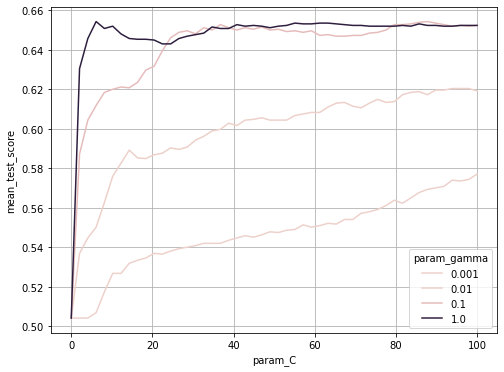

In [196]:
result2 = pd.DataFrame(m_gs2.cv_results_)
tmp2 = result2.loc[:, ['param_C', 'param_gamma', 'mean_test_score']]

plt.figure(figsize = (8,6))
sns.lineplot(x = 'param_C', y = 'mean_test_score', data = tmp2, hue='param_gamma' )
plt.grid()
plt.show()

In [201]:
m_gs2.best_score_

0.6543258101851852